In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
train = pd.read_csv("/content/drive/MyDrive/Advanced analytics/train_new.csv")

In [68]:
free_text_cols = ['property_name', 'property_summary', 'property_space',
       'property_desc', 'property_neighborhood', 'property_notes',
       'property_transit', 'property_access', 'property_interaction',
       'property_rules', 'host_about']
missing_value = ['property_sqfeet']

In [69]:
# can property_id indicate the time the host has been on airbnb?
# host who has more properties will be more expensive? keep host_id?
cols_to_drop= ['property_id'] + free_text_cols + missing_value + ['host_id']
train2 = train.drop(cols_to_drop, axis=1)
#train2 = train2.host_response_time.add_categories(['missing'])
train2['host_response_time']=train2.host_response_time.fillna('missing')
train2['reviews_first']=train2.reviews_first.fillna('missing')
col_reviews=['reviews_first', 'reviews_last', 'reviews_rating', 'reviews_acc',
       'reviews_cleanliness', 'reviews_checkin', 'reviews_communication',
       'reviews_location', 'reviews_value', 'reviews_per_month']
for i in col_reviews:
    train2[i]=train2[i].fillna('missing')

In [70]:
others = ['host_response_rate', 'property_scraped_at', "host_location"]
# keep location
train3=train2.drop(others,axis=1)
train3.isna().sum()

property_zipcode            134
property_lat                  0
property_lon                  0
property_type                 0
property_room_type            0
property_max_guests           0
property_bathrooms           12
property_bedrooms             9
property_beds                11
property_bed_type             0
property_amenities           52
property_last_updated         0
host_since                    1
host_response_time            0
host_nr_listings              1
host_nr_listings_total        1
host_verified                 0
booking_price_covers          0
booking_min_nights            0
booking_max_nights            0
booking_availability_30       0
booking_availability_60       0
booking_availability_90       0
booking_availability_365      0
booking_cancel_policy         0
reviews_num                   0
reviews_first                 0
reviews_last                  0
reviews_rating                0
reviews_acc                   0
reviews_cleanliness           0
reviews_

In [71]:
# what if the test set has the na for these features?
# later, we can also predict zipcode from the precious position?
train4 =train3.dropna(subset = ['host_since', 'extra', 'property_zipcode'])

In [72]:
train4['property_bathrooms']=train4['property_bathrooms'].fillna(0)
train4['property_beds']=train4['property_beds'].fillna(0)
train4['property_bedrooms']=train4['property_bedrooms'].fillna(0)
train4['property_amenities']=train4['property_amenities'].fillna('missing')

<ipython-input-72-88cf4d226163>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train4['property_bathrooms']=train4['property_bathrooms'].fillna(0)
<ipython-input-72-88cf4d226163>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train4['property_beds']=train4['property_beds'].fillna(0)
<ipython-input-72-88cf4d226163>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [73]:
df=train4.copy()


In [74]:
import datetime
now=datetime.datetime.now()

In [75]:
df['host_since']=pd.to_datetime(df['host_since'])
df['host_days'] = (now-df['host_since']).dt.days
df = df.drop('host_since', axis=1)

In [76]:
## write a function that create a list of character, remove leading and trailing , sort and lower case for a text
def trans_text(text):
  text_trans = text.split(",")
  text_trans = [string.strip() for string in text_trans]
  text_trans = [string.lower() for string in text_trans]
  text_trans = sorted(text_trans)
  text_final = text_trans[0]
  for idx in range(1, len(text_trans)):
    text_final += ", " + text_trans[idx]
  return(text_final)

In [77]:
property_amenities_trans = []
for text in df["property_amenities"]:
  property_amenities_trans += [trans_text(text)]

In [78]:
len(np.unique(property_amenities_trans))

5926

In [79]:
df["property_amenities_trans"] = property_amenities_trans

In [80]:
df.loc[df.target > 160, "property_amenities_trans"]

13      buzzer/wireless intercom, essentials, family/k...
24      buzzer/wireless intercom, dryer, elevator in b...
66      dryer, essentials, family/kid friendly, hanger...
205     pets allowed, smoking allowed, suitable for ev...
234     breakfast, essentials, hair dryer, hangers, he...
                              ...                        
6372    buzzer/wireless intercom, cable tv, essentials...
6381    hangers, heating, indoor fireplace, kitchen, l...
6410    buzzer/wireless intercom, cable tv, cat(s), do...
6450    essentials, family/kid friendly, hair dryer, h...
6493    dryer, essentials, family/kid friendly, first ...
Name: property_amenities_trans, Length: 228, dtype: object

In [81]:
for i in df["property_amenities"].head(1):
  print(i)

TV, Cable TV, Wireless Internet, Kitchen, Breakfast, Indoor fireplace, Heating, Family/kid friendly, Dryer, Smoke detector, Essentials, Shampoo, Hangers, Hair dryer, Iron, Laptop friendly workspace


In [82]:
host_verified_trans = []
for text in df["host_verified"]:
  host_verified_trans += [trans_text(text)]

In [83]:
len(np.unique(host_verified_trans))

146

In [84]:
len(np.unique(df.host_verified))

146

In [85]:
object_type_cols=list(df.select_dtypes(include='object').columns)


In [86]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
for i in object_type_cols:
    df[i] = df[i].astype(str)
    df[i]= label_encoder.fit_transform(df[i])

In [87]:
df["property_type"].head(10)

1     14
2      8
3     14
4     14
5     14
6     14
7      0
8      0
9      0
10     0
Name: property_type, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2, random_state = 7)

In [89]:
train_df["locate"] = "Brussel"
train_df.loc[train_df.property_lat > 51, "locate"] = "Antwerp"

In [90]:
train_df.loc[train_df.target > 160].groupby("locate").count()

,property_zipcode,property_lat,property_lon,property_type,property_room_type,property_max_guests,property_bathrooms,property_bedrooms,property_beds,property_bed_type,...,reviews_cleanliness,reviews_checkin,reviews_communication,reviews_location,reviews_value,reviews_per_month,extra,target,host_days,property_amenities_trans
locate,,,,,,,,,,,,,,,,,,,,,
Antwerp,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
Brussel,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156


In [91]:
lon_high_avg_brus = np.mean(train_df.loc[(train_df.target > 160) & (train_df.locate == "Brussel"), "property_lon"])
lat_high_avg_brus = np.mean(train_df.loc[(train_df.target > 160) & (train_df.locate == "Brussel"), "property_lat"])
lon_high_avg_ant = np.mean(train_df.loc[(train_df.target > 160) & (train_df.locate == "Antwerp"), "property_lon"])
lat_high_avg_ant = np.mean(train_df.loc[(train_df.target > 160) & (train_df.locate == "Antwerp"), "property_lat"])

In [92]:
train_df["distance"] = np.sqrt(np.power(train_df.loc[train_df.locate == "Brussel", "property_lon"] - lon_high_avg_brus, 2)+
                               np.power(train_df.loc[train_df.locate == "Brussel", "property_lat"] - lat_high_avg_brus, 2))

train_df.loc[train_df.locate == "Antwerp", "distance"] = np.sqrt(np.power(train_df.loc[train_df.locate == "Antwerp", "property_lon"] - lon_high_avg_ant, 2)+
                                                                 np.power(train_df.loc[train_df.locate == "Antwerp", "property_lat"] - lat_high_avg_ant, 2))

In [93]:
val_df["distance"] = np.sqrt(np.power(val_df.loc[val_df.property_lat <= 51, "property_lon"] - lon_high_avg_brus, 2)+
                               np.power(val_df.loc[val_df.property_lat <= 51, "property_lat"] - lat_high_avg_brus, 2))

val_df.loc[val_df.property_lat > 51, "distance"] = np.sqrt(np.power(val_df.loc[val_df.property_lat > 51, "property_lon"] - lon_high_avg_ant, 2)+
                                                          np.power(val_df.loc[val_df.property_lat > 51, "property_lat"] - lat_high_avg_ant, 2))

In [94]:
train_df = train_df.drop("locate", axis = 1)

In [95]:

X_train=train_df.drop('target',axis=1)
y_train=train_df['target']

y_val=val_df['target']

In [96]:
X_train = X_train.drop(["property_amenities_trans", "property_amenities", "extra", "host_days"],axis=1)

In [97]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

tree_model = RandomForestRegressor(max_depth=30, random_state=7)
tree_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, random_state=7)

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
import time

<BarContainer object of 35 artists>

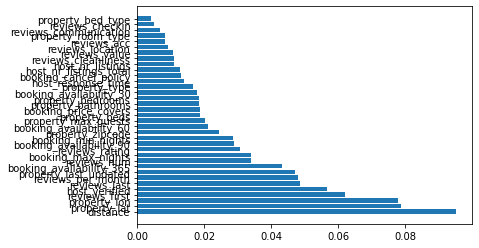

In [99]:
feature_importances = tree_model.feature_importances_
sorted_idx = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_idx]
sorted_columns = list(X_train.columns[sorted_idx])

plt.barh(sorted_columns, sorted_importances)

In [100]:
feature_importance_df=pd.DataFrame(list(X_train.columns), tree_model.feature_importances_).reset_index()
feature_importance_df.columns=['score','feature']
select=list(feature_importance_df.sort_values(by='score', ascending=False).iloc[:15,:].feature)
select

['distance',
 'property_lat',
 'property_lon',
 'reviews_first',
 'host_verified',
 'reviews_last',
 'reviews_per_month',
 'property_last_updated',
 'booking_availability_365',
 'reviews_num',
 'booking_max_nights',
 'reviews_rating',
 'booking_availability_90',
 'booking_min_nights',
 'property_zipcode']

In [101]:
select = X_train.columns

In [102]:
X_train2=train_df.drop('target',axis=1)
y_train2=train_df['target']

In [103]:
'''
## grid search cross validation

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 5, 10, 30],
    'min_samples_leaf': [10, 20, 30]
}

rf_model = RandomForestRegressor()

kf = KFold(n_splits=5, shuffle=True, random_state=7 )

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')

grid_search.fit(X_train2[select], y_train2)

# Print the best hyperparameters and corresponding mean score
print("Best parameters:", grid_search.best_params_)
print("Best score:", (-grid_search.best_score_)**0.5)



Best parameters: {'max_depth': 2, 'min_samples_leaf': 30, 'n_estimators': 200}
Best score: 52.14260594222867
'''

'\n## grid search cross validation\n\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.model_selection import GridSearchCV, KFold\n\n# Define the parameter grid to search over\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [2, 5, 10, 30],\n    \'min_samples_leaf\': [10, 20, 30]\n}\n\nrf_model = RandomForestRegressor()\n\nkf = KFold(n_splits=5, shuffle=True, random_state=7 )\n\ngrid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kf, scoring=\'neg_mean_squared_error\')\n\ngrid_search.fit(X_train2[select], y_train2)\n\n# Print the best hyperparameters and corresponding mean score\nprint("Best parameters:", grid_search.best_params_)\nprint("Best score:", (-grid_search.best_score_)**0.5)\n\n\n\nBest parameters: {\'max_depth\': 2, \'min_samples_leaf\': 30, \'n_estimators\': 200}\nBest score: 52.14260594222867\n'

In [104]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=200, max_depth=2, criterion = "squared_error",
                             min_samples_leaf = 20,
                             random_state=7)
regr.fit(X_train2[select], y_train2)

RandomForestRegressor(max_depth=2, min_samples_leaf=20, n_estimators=200,
                      random_state=7)

<BarContainer object of 35 artists>

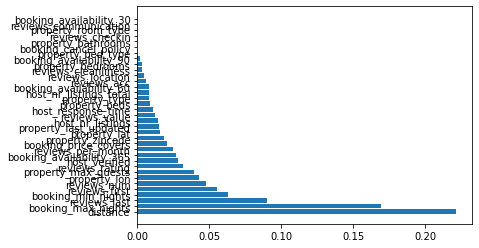

In [105]:
feature_importances = regr.feature_importances_
sorted_idx = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_idx]
sorted_columns = list(X_train.columns[sorted_idx])

plt.barh(sorted_columns, sorted_importances)

In [106]:
import math
import sklearn.metrics

In [107]:
mse = sklearn.metrics.mean_squared_error(regr.predict(X_train2[select]), y_train2)
print(math.sqrt(mse))

51.85918909189604


In [108]:
X_val=val_df[select]

In [109]:
mse = sklearn.metrics.mean_squared_error(regr.predict(X_val), y_val)
print(math.sqrt(mse))


52.10878063346452


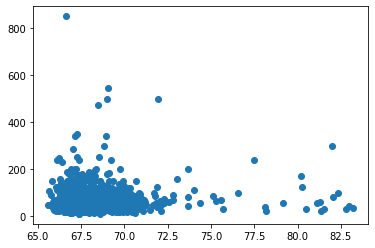

In [110]:
plt.scatter(regr.predict(X_val), y_val)
plt.show()

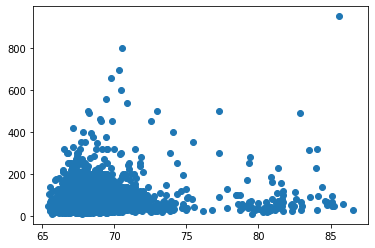

In [111]:
plt.scatter(regr.predict(X_train2[select]), y_train2)
plt.show()

In [112]:
np.sqrt(sklearn.metrics.mean_squared_error(np.exp(regr.predict(X_val)), y_val))

6.0264976832661765e+34

In [113]:
data_predict = pd.DataFrame({'predict': np.exp(regr.predict(X_val)),
                             'real': y_val})

In [114]:
math.sqrt(sklearn.metrics.mean_squared_error(data_predict.predict[data_predict.real < 160], data_predict.real[data_predict.real < 160],))

6.026478828216491e+34

In [115]:
len(data_predict.real[data_predict.real > 300])

8

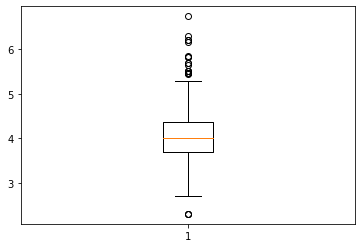

In [116]:
plt.boxplot(np.log(y_val))
plt.show()


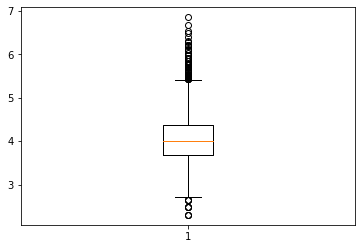

In [117]:
plt.boxplot(np.log(y_train2))
plt.show()


In [118]:
np.quantile(data_predict.real, 0.95)

149.0

In [119]:
np.quantile(y_train2, 0.95)

150.0

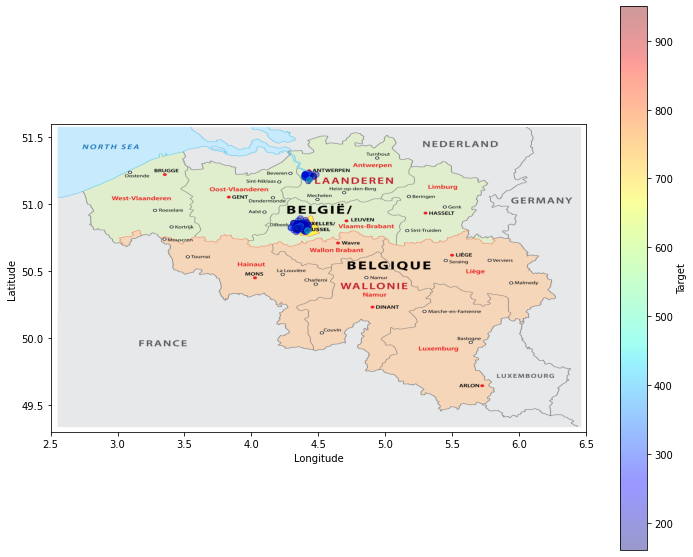

In [120]:
import urllib.request

url = "https://www.worldatlas.com/upload/7a/e1/b7/regions-of-belgium-map.png"

# Download the image and save it locally
urllib.request.urlretrieve(url, "belgium_map.png")

# Read the image using matplotlib
belgium_map = plt.imread("belgium_map.png")

# Plot the data on top of the map using scatterplot
fig, ax = plt.subplots(figsize=(12, 10))
ax.imshow(belgium_map, extent=[2.5, 6.5, 49.3, 51.6])
scatter = ax.scatter(train_df.loc[train_df.target > 160, "property_lon"], 
                     train_df.loc[train_df.target > 160, "property_lat"], 
                     c=train_df.loc[train_df.target > 160,"target"],
                     cmap=plt.get_cmap("jet"), alpha=0.4)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
cbar = fig.colorbar(scatter)
cbar.set_label("Target")
plt.show()


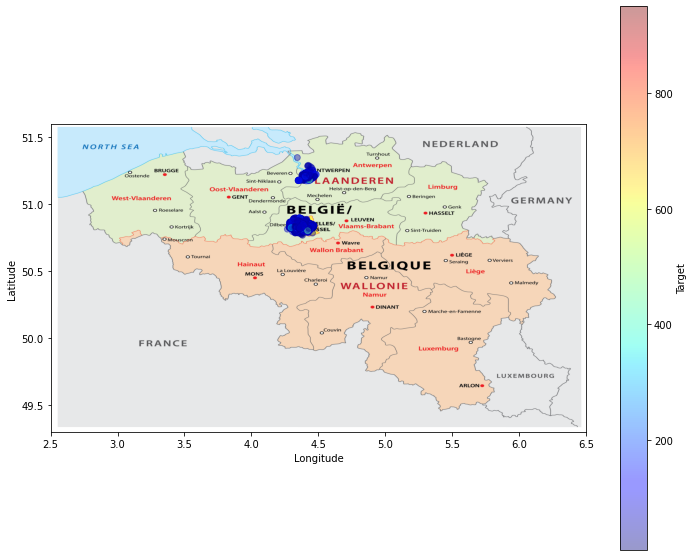

In [121]:
import urllib.request

url = "https://www.worldatlas.com/upload/7a/e1/b7/regions-of-belgium-map.png"

# Download the image and save it locally
urllib.request.urlretrieve(url, "belgium_map.png")

# Read the image using matplotlib
belgium_map = plt.imread("belgium_map.png")

# Plot the data on top of the map using scatterplot
fig, ax = plt.subplots(figsize=(12, 10))
ax.imshow(belgium_map, extent=[2.5, 6.5, 49.3, 51.6])
scatter = ax.scatter(train_df.loc[:, "property_lon"], 
                     train_df.loc[:, "property_lat"], 
                     c=train_df.loc[:,"target"],
                     cmap=plt.get_cmap("jet"), alpha=0.4)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
cbar = fig.colorbar(scatter)
cbar.set_label("Target")
plt.show()


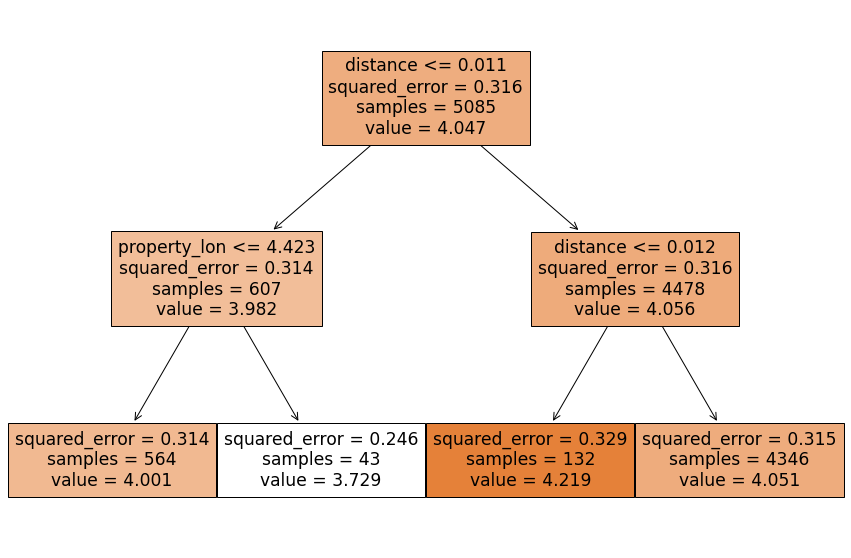

In [122]:

from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
import matplotlib.pyplot as plt
# Train a decision tree regressor on the Boston housing dataset
tree_reg = DecisionTreeRegressor(max_depth=2, min_samples_leaf = 30)
tree_reg.fit(X_train2[select], np.log(y_train2))

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_reg, feature_names=X_train2[select].columns, filled=True)
plt.show()


In [123]:
train_df.loc[(X_train2.property_lat > 50.788) & (X_train2.booking_min_nights <= 6.5), :].sort_values("target", ascending = False)["target"]

2311    950
3586    800
2948    696
3529    656
1970    600
       ... 
6228     12
2972     12
599      10
740      10
894      10
Name: target, Length: 4696, dtype: int64

In [124]:
mse = sklearn.metrics.mean_squared_error(tree_reg.predict(X_val), np.log(y_val))
print(math.sqrt(mse))

0.5602311223208165


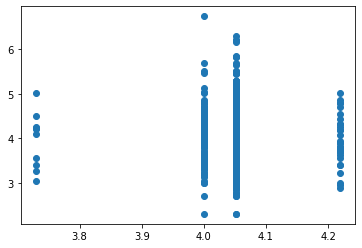

In [125]:
plt.scatter(tree_reg.predict(X_val), np.log(y_val))
plt.show()

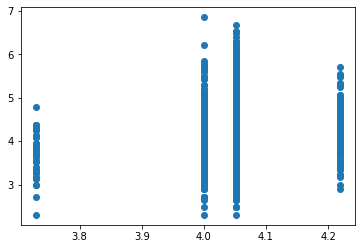

In [126]:
plt.scatter(tree_reg.predict(X_train2[select]), np.log(y_train2))
plt.show()

In [127]:
max(np.log(y_train2))

6.856461984594587

In [128]:
math.exp(4.142)

62.92855278152198

In [129]:
X_train2.loc[X_train2.reviews_per_month <= 2294.5, :].shape

(5085, 39)

Tommorow, need to create feature that can capture the high value rent,
or adjust the hyperparameter of regression tree.
create the area contain high rent => calculate eclid distance